In [1]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
#reading the dataset, deleting missing value entries
df = pd.read_csv("C:/Users/ideod/OneDrive/Documents/new folder zip data/house_data.csv")



df.head()

df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#encoding and selecting features
enc = OrdinalEncoder()


df[['zipcode']] = enc.fit_transform(df[['zipcode']])

In [5]:
#selecting features: X-axis
selected_features = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','zipcode']]

display(selected_features)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,42.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,60.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,59.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,15.0


In [6]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [7]:
# defining y variable

y = df['price'].values

In [8]:
#creating a split (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [9]:
#training decision tree regressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
DTRscore = []
for i in ['friedman_mse', 'squared_error', 'poisson']:

    regressor = DecisionTreeRegressor(random_state =0, criterion = i)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    DTRscore.append(regressor.score(X_test,y_test))
    print (DTRscore)

[0.6488738161954315]
[0.6488738161954315, 0.6488738161954315]
[0.6488738161954315, 0.6488738161954315, 0.631424498750907]


In [10]:
max(DTRscore)

0.6488738161954315

In [11]:
#SVR regression linear, non-linear 

from sklearn.svm import SVR
score1 = []
for k in ['linear', 'poly', 'rbf', 'sigmoid']:

    svr_model = SVR(kernel = k, gamma ='auto', C =100, epsilon = 0.1)
    svr_model.fit(X_train,y_train)
    y_pred1 = svr_model.predict(X_test)
    score1.append (svr_model.score(X_test,y_test))
                   
  
    print (score1)

[0.5963737514751741]
[0.5963737514751741, -0.006321510251489082]
[0.5963737514751741, -0.006321510251489082, 0.11047837258735205]
[0.5963737514751741, -0.006321510251489082, 0.11047837258735205, 0.2925147870403535]


In [12]:
max(score1)

0.5963737514751741

In [20]:
#training RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
score2 = []

for k in range (290,300):
    optRFR = RandomForestRegressor(n_estimators = k, random_state = 0)
    optRFR = optRFR.fit(X_train, y_train)
    y_predOPT = optRFR.predict(X_test)
    score2.append(optRFR.score(X_test, y_test))
  

In [21]:
print (score2)

[0.8087245711168889, 0.8087722970521004, 0.8086718807299723, 0.8087207335798438, 0.8088754647143068, 0.8089403887893791, 0.8090559144113612, 0.80913488537031, 0.8091550501899096, 0.8093880524660113]


In [22]:
max(score2)

0.8093880524660113

In [23]:
#training KNN regressor model
from sklearn.neighbors import KNeighborsRegressor
score3 = []
for n in range (1,10):
    knn = KNeighborsRegressor(n_neighbors =n)
    knn.fit(X_train,y_train)
    y_predict= knn.predict(X_test)
    score3.append(knn.score(X_test,y_test))
    print(score3)
   

[0.4989662399911087]
[0.4989662399911087, 0.6281349393598548]
[0.4989662399911087, 0.6281349393598548, 0.6487563856254126]
[0.4989662399911087, 0.6281349393598548, 0.6487563856254126, 0.6606574975958495]
[0.4989662399911087, 0.6281349393598548, 0.6487563856254126, 0.6606574975958495, 0.6725420656680301]
[0.4989662399911087, 0.6281349393598548, 0.6487563856254126, 0.6606574975958495, 0.6725420656680301, 0.6740159064885654]
[0.4989662399911087, 0.6281349393598548, 0.6487563856254126, 0.6606574975958495, 0.6725420656680301, 0.6740159064885654, 0.6718231761809675]
[0.4989662399911087, 0.6281349393598548, 0.6487563856254126, 0.6606574975958495, 0.6725420656680301, 0.6740159064885654, 0.6718231761809675, 0.6756395230671954]
[0.4989662399911087, 0.6281349393598548, 0.6487563856254126, 0.6606574975958495, 0.6725420656680301, 0.6740159064885654, 0.6718231761809675, 0.6756395230671954, 0.6827569735653904]


In [24]:
max(score3)

0.6827569735653904

In [27]:
#training Polynomial regression model
scoresPOLY = []
for i in range(1,4):
    poly=PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X)
    
    x_trainp, x_testp, y_trainp, y_testp = train_test_split(x_poly, y, test_size=0.2, random_state=0)
    
    model = LinearRegression()
    model.fit(x_trainp, y_trainp)
    
    score = model.score(x_testp, y_testp)
    scoresPOLY.append(score)
   


In [28]:
max(scoresPOLY)

0.715598370754976

In [31]:
# plotting scores for all models  tested above for comparison
models = ['DTR', 'POLY' , 'SVR','RFR', 'KNN']

maxscores = [max(DTRscore), max(scoresPOLY), max(score1), max(score2), max(score3)]



<function matplotlib.pyplot.show(close=None, block=None)>

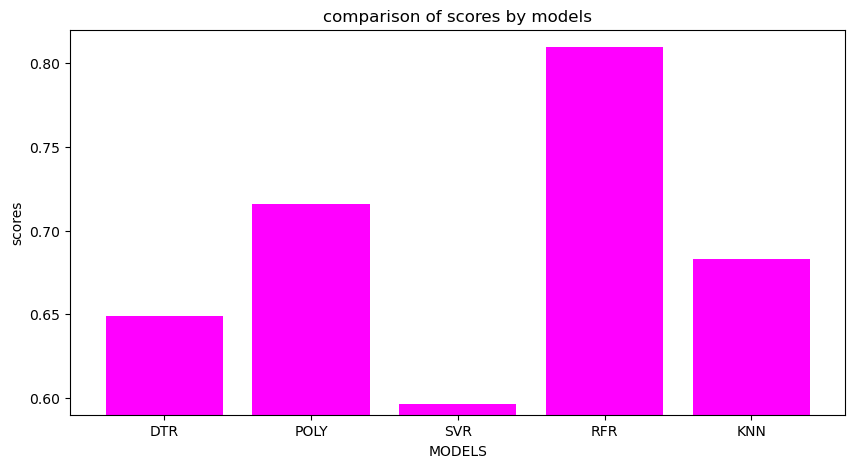

In [32]:
#comparison of max scores by models (PLOTTING)
fig = plt.figure(figsize= (10,5))
plt.bar(models, maxscores, color = 'magenta')
plt.xlabel("MODELS")
plt.ylabel("scores")
plt.title("comparison of scores by models")
plt.ylim(0.59,0.82)

plt.show

In [33]:
#conclusion:

print ("as per the figure above Random Forest Regression provides highest accuracy score")

as per the figure above Random Forest Regression provides highest accuracy score


In [34]:
fd = pd.read_csv("C:/Users/ideod/OneDrive/Documents/new folder zip data/house_data.csv")


fd.head()

fd.dropna()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [36]:
selected_features1 = fd[['bedrooms', 'bathrooms', 'floors', 'zipcode']]

display(selected_features1)

,bedrooms,bathrooms,floors,zipcode
0,3,1.00,1.0,98178
1,3,2.25,2.0,98125
2,2,1.00,1.0,98028
3,4,3.00,1.0,98136
4,3,2.00,1.0,98074
...,...,...,...,...
21608,3,2.50,3.0,98103
21609,4,2.50,2.0,98146
21610,2,0.75,2.0,98144
21611,3,2.50,2.0,98027


In [37]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X1 = scaler.fit_transform(selected_features1)

In [38]:
# defining y variable

y1 = fd['price'].values

In [39]:
#creating a split (train/test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=45)

In [40]:
from sklearn.ensemble import RandomForestRegressor
optRFR1 = RandomForestRegressor(n_estimators = 300, random_state = 0)
optRFR1 = optRFR.fit(X1_train, y1_train)
y1_predOPT = optRFR1.predict(X1_test)

In [41]:
expect = y1_test

In [42]:
#STEP 6 below: predicting house price
dict = {"bedrooms":[3], "bathrooms":[2],"floors":[1],"zipcode":[98028]}

In [43]:
fd = pd.DataFrame(dict)

In [44]:
X2 = scaler.transform(fd)

In [45]:
y_predicting = optRFR1.predict(fd.values)

In [46]:
print(y_predicting)

[1178118.17646122]
